In [354]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize =1
        
        self.hiddenLayerSize =3
        self.hiddenLayer2Size = 5
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)
#         self.W3=np.random.rand(self.hiddenLayer2Size, self.outputLayerSize)
        
    def updateHiddenLayer(self):
        
        self.W1=np.random.rand(self.inputLayerSize, self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize, self.hiddenLayer2Size)
        self.W3=np.random.rand(self.hiddenLayer2Size, self.outputLayerSize)

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def forward_relu(self,X): ###added for q2: relu
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        
        ##did u have to add the following lines
        self.a3 = self.relu(self.z3)
        self.z4 = np.dot(self.a3,self.W3)
        
        yHat = self.sigmoid(self.z4) # and modify to be z4
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunction_relu(self, X, y): ###added for q2: relu
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward_relu(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    
    def costFunctionPrime_relu(self, X, y): ###added for q2: relu
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward_relu(X)
        
        delta3 = np.multiply(-(y-self.yHat),self.reluPrime(self.z4))
        dJdW3=np.dot(self.a3.T,delta3)
        
        delta2=np.dot(delta3,self.W3.T)*self.reluPrime(self.z3)
        dJdW2=np.dot(self.a2.T,delta2)
        
        delta1 = np.dot(delta2,self.W2.T)*self.reluPrime(self.z2)
        djdW1 = np.dot(X.T, delta1)
        return dJdW1, dJdW2, dJdW3
    

In [355]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

In [356]:
X


array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  1.]])

In [357]:
y

array([[75.],
       [80.],
       [93.]])

In [358]:
X=X/np.amax(X,axis=0)
y=y/100

In [359]:
X,y


(array([[0.3, 1. ],
        [0.5, 0.2],
        [1. , 0.2]]),
 array([[0.75],
        [0.8 ],
        [0.93]]))

In [360]:
NN=Neural_Network()

In [361]:
yH=NN.forward(X)

In [362]:
yH

array([[0.65984552],
       [0.6446121 ],
       [0.64950593]])

In [363]:
y

array([[0.75],
       [0.8 ],
       [0.93]])

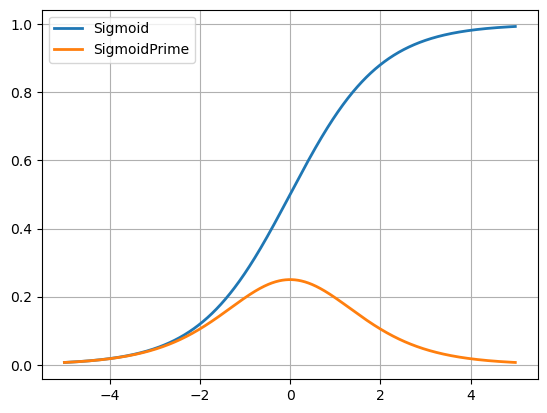

In [364]:
testValues=np.arange(-5,5,0.01)
plt.plot(testValues,NN.sigmoid(testValues),linewidth=2)
plt.plot(testValues, NN.sigmoidPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['Sigmoid','SigmoidPrime'])

In [365]:
NN=Neural_Network()

In [366]:
cost1=NN.costFunction(X,y)

In [367]:
cost1

array([0.01419174])

In [368]:
dJdW1,dJdW2=NN.costFunctionPrime(X,y)

In [369]:
dJdW1

array([[-0.00564198, -0.00772104, -0.0018137 ],
       [-0.00083742, -0.00119377, -0.00027678]])

In [370]:
dJdW2

array([[-0.02350115],
       [-0.01823622],
       [-0.02017063]])

In [371]:
scalar=1
NN.W1 = NN.W1+scalar*dJdW1
NN.W2 = NN.W2+scalar*dJdW2
cost2 = NN.costFunction(X,y)
print (cost1,cost2)

[0.01419174] [0.01566589]


In [372]:
scalar=0.1
NN.W1 = NN.W1-scalar*dJdW1
NN.W2 = NN.W2-scalar*dJdW2
cost3 = NN.costFunction(X,y)
print (cost2,cost3)

[0.01566589] [0.01551069]


351


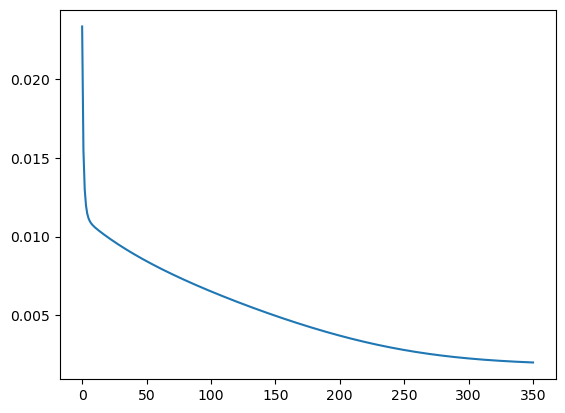

In [373]:
###Q1
NN1 = Neural_Network()
NN2 = Neural_Network()


cost_history1 = []
iterations = 0

cost = 100
while cost > 0.002:
    scalar = 3
    dJdW1, dJdW2 = NN1.costFunctionPrime(X, y)
    NN1.W1 = NN1.W1 - scalar * dJdW1
    NN1.W2 = NN1.W2 - scalar * dJdW2
    cost = NN1.costFunction(X, y)
    cost_history1.append(cost)
    iterations += 1
    
plt.plot(cost_history1)
print(iterations)

38


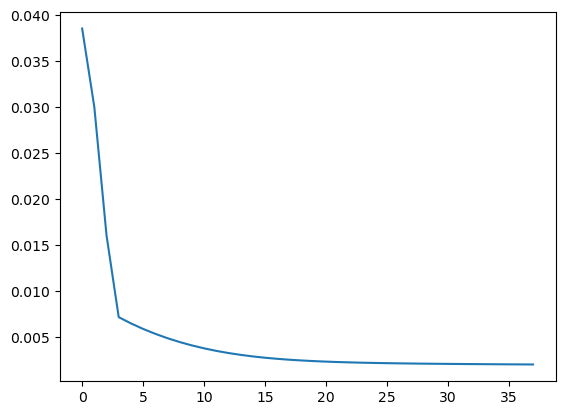

In [374]:
# using a bigger scalar

cost_history2 = []
iterations = 0

cost = 100
while cost > 0.002:
    scalar = 30
    dJdW1, dJdW2 = NN2.costFunctionPrime(X, y)
    NN2.W1 = NN2.W1 - scalar * dJdW1
    NN2.W2 = NN2.W2 - scalar * dJdW2
    cost = NN2.costFunction(X, y)
    cost_history2.append(cost)
    iterations += 1
    
plt.plot(cost_history2)
print(iterations)

14


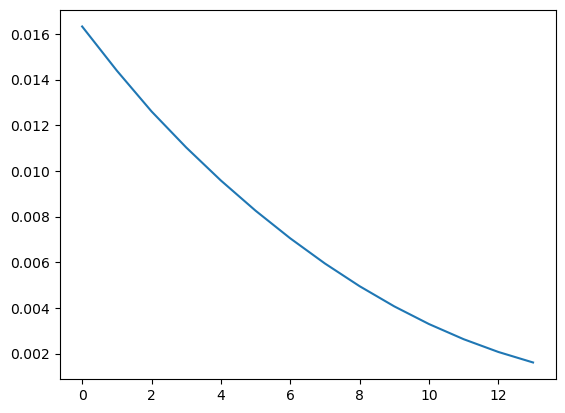

In [375]:
###2

NN3 = Neural_Network()
NN3.updateHiddenLayer()

cost_history3 = []
iterations = 0

cost = 100
while cost > 0.002:
    scalar = 1
    dJdW1, dJdW2, dJdW3 = NN3.costFunctionPrime_relu(X, y)
    NN3.W1 = NN3.W1 - scalar * dJdW1
    NN3.W2 = NN3.W2 - scalar * dJdW2
    NN3.W3 = NN3.W3 - scalar * dJdW3
    cost = NN3.costFunction_relu(X, y)
    cost_history3.append(cost)
    iterations += 1
#     print(cost)
    
plt.plot(cost_history3)
print(iterations)